# UDACITY - CRISP-DM PROJECT  

## A closer look into the data of Seattle’s Airbnb market

## 1. BUSINESS UNDERSTANDING

The Seattle AirBnB Dataset includes information on AirBnB listings in Seattle, as well as calendar availability and user reviews for each listing. I am intending to try to answer the relevant business questions using this dataset. 

#### Pricing Trends
1. What are the differences in pricing between the months of the year? 
2. How does pricing differ by neighbourhood, and which Seattle neighbourhoods are the most expensive? 
3. What effect does the kind of property in an area have on the price of the most costly neighbourhoods and the most prevalent property types? 

#### Sentiment Analysis of Reviews
4. How can we classify reviews focused on sentiments?
5. Can we correlate positive and negative attitudes from reviews to neighbourhoods to see which neighbourhoods have higher positive sentiments and which have higher negative sentiments? 
6. Is it possible to look into some of the worst reviews for additional insights?

#### Price Prediction
Can we forecast a listing's price?
What aspects of the listing have the best correlation with price prediction? 

Pricing trend concerns can facilitate AirBnB better identify peak seasons and neighbourhoods in Seattle, allowing them to adjust inventory accordingly. It can also aid in the creation of more targeted marketing efforts. 

AirBnB can gain insight into brand affinity and evaluate consumer interest by analysing the sentiment of reviews.
Furthermore, associating attitudes with localities can help to identify troubled areas. 

Pricing prediction can assist in determining which factors are most closely related to price.
This is beneficial because these qualities will be high on the priority list for both AirBnB guests and AirBnB hosts. 

## 2. DATA UNDERSTANDING

 #### Section 2.1 Importing Libraries

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Let's look at the data

As a first stage, I'll analyze the three files that make up the Seattle AirBnB dataset and dig into each one. 

   #### Section 2.2 Gathering Data

In [2]:
# Read in the listings data set
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Read in the reviews data set
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# Read in the calendar data set
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Section 2.3 Understanding Listing Data Set

### CALENDAR Data Set

Let's start with the Calendar data set. We'll look at a few items, including: 
1. The dataset's row and column counts 
2. Missing values columns and columns with no missing values 
3. Describe the dataset to learn more about each column's characteristics and structure of the dataset. 

In [5]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_calendar.shape)
# Assess null values
print(df_calendar.isnull().sum())
# Describe
print(df_calendar.describe(include='all'))

Number of rows and columns:  (1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-05-22         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


#### FINDINGS

Based on the the above, it appears that few data preparation will be considered necessary in using this dataset.
Solely missing values are in the price column, which could simply be due to the listing being unavailable on those days. 

### LISTINGS Data Set

Next, Let's investigate at the Listings dataset. We'll take a glance at some of those issues: 
1. The dataset's row and column counts 
2. Missing values columns and columns with no missing values 
3. Describe the dataset to learn more about each column's attributes and structure of the dataset
4. Investigate some of the categorical attributes. 

In [6]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_listings.shape)
# Assess null values
pd.set_option('display.max_rows',None)
print(df_listings.isnull().sum())

Number of rows and columns:  (3818, 92)
id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rat

In [7]:
# Describe
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [8]:
# Investigate Categorical attributes - experiences_offered
print('Value counts for experiences_offered: ', df_listings['experiences_offered'].value_counts())

Value counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


In [9]:
# Investigate Categorical attributes - host_location
print('Value counts for host_location: ', df_listings['host_location'].value_counts())

Value counts for host_location:  Seattle, Washington, United States                                    3259
US                                                                     246
Spokane, Washington, United States                                      41
Kent, Washington, United States                                         34
Los Angeles, California, United States                                  13
Bellevue, Washington, United States                                     12
San Francisco, California, United States                                11
Mercer Island, Washington, United States                                10
Kirkland, Washington, United States                                      8
New York, New York, United States                                        6
Seattle                                                                  5
Sammamish, Washington, United States                                     5
Vashon, Washington, United States                                  

#### FINDINGS

For all rows, the experiences presented are None.
If we're going to use the host location field for analysis, it could use some standardization. For instance:
"Seattle, Washington, United States," "Seattle," and "Seattle, Washington" are all identical. 

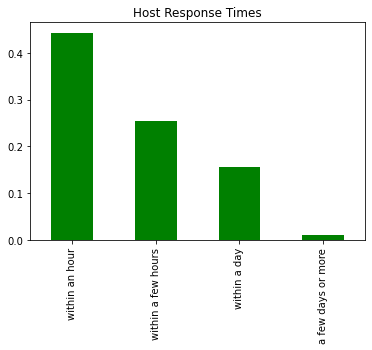

In [10]:
# Investigate Categorical Feature - host_response_time
host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind='bar', color = 'green');
plt.title("Host Response Times");

#### FINDINGS

It looks like a good percentage of hosts respond within an hour and it's a downward trend from there.

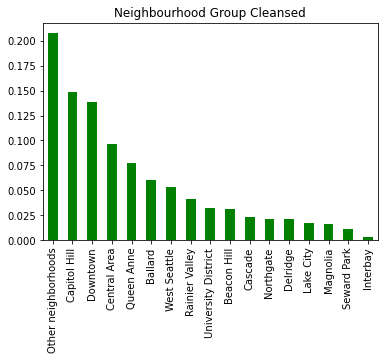

In [11]:
# Investigate Categorical Feature - neighborhood_group_cleansed
neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind='bar', color = 'green');
plt.title("Neighbourhood Group Cleansed");

#### FINDINGS

The chart above is tilted to the left.
Apart from other neighbourhoods, we can notice that some of them have a large number of accommodations.
There are two elements that have an impact on these figures.


1. The population of Capital Hill and Downtown is significantly higher than that of Seaward Park and Interbay.
As a result, we can conclude that accomodations are plentiful in densely populated areas, and that if there are more people, more accomodation can be provided.

2. Tourist visit- Using my Google skills, I can state that these are the most visited tourist attractions in Seattle. 

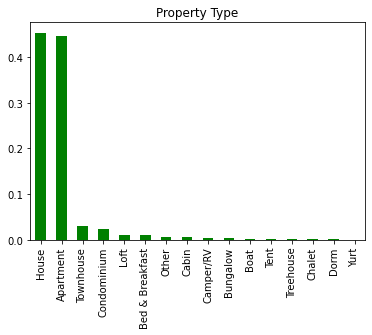

In [12]:
# Investigate Categorical Feature - property_type
property_type = df_listings['property_type'].value_counts()
(property_type/df_listings.shape[0]).plot(kind='bar', color = 'green');
plt.title("Property Type");

#### FINDINGS

Based on the chart above, We can simply see which properties are more expensive. 

It's vital to make sure that apartments and houses account for the majority of the listings data.
If any of our analyses need it, we can concentrate on these. 

### CALENDAR Data Set

#### Section 2.4 Understanding the Calendar Data Set

Let's look at the CALENDAR data set next. We'll take a look at a few items: :
1. The dataset's row and column counts 
2. Missing values columns and columns with no missing values
3. Describe the dataset to learn more about each column's attributes and structure of the dataset

In [13]:
# Print rows and columns in calendar data set
print('number of rows and columns- ', df_calendar.shape)
# Assess null values
print('number of null values:\n', df_calendar.isnull().sum())
# Describe
df_calendar.describe(include= "all")

number of rows and columns-  (1393570, 4)
number of null values:
 listing_id         0
date               0
available          0
price         459028
dtype: int64


,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-05-22,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


### REVIEWS Data Set

#### Section 2.5 Understanding Reviews Data Set

Let's look at the Reviews data set next. We'll take a look at a few items: 
1. The dataset's row and column counts 
2. Missing values columns and columns with no missing values
3. Describe the dataset to learn more about each column's attributes and structure of the dataset

In [14]:
# Print rows and columns in reviews data set
print('number of rows and columns- ', df_reviews.shape)
# Assess null values
print('number of null values:\n', df_reviews.isnull().sum())
# Describe
df_reviews.describe(include= "all")

number of rows and columns-  (84849, 6)
number of null values:
 listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


### 3. DATA ANALYSIS


#### Section 3.1 Questions

**1.** What are the differences in pricing between the months of the year?   <br>
**2.** How does pricing differ by neighbourhood, and which Seattle neighbourhoods are the most expensive?  <br>
**3.** What effect does the kind of property in an area have on the price of the most costly neighbourhoods and the most prevalent property types?  

1. What are the differences in pricing between the months of the year? 

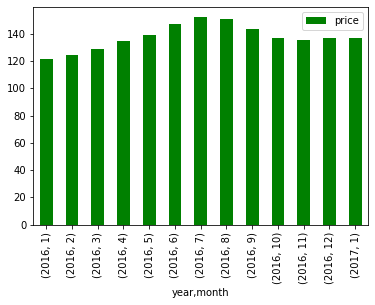

In [15]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to make average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind='bar', color = 'green');

#### FINDINGS

According to the chart above, the peak months are June through August, with July being the highest.
With summer in full swing and low potential of rain, the chart validates my hypothesis that these months in Seattle have the optimum weather. 

Furthermore, it looks likely that the year begins gradually, with the minimum average price in January.
Prices begin to rise again around April/May respectively, as we approach Spring and the holiday season.and November/December for Winter holiday. 

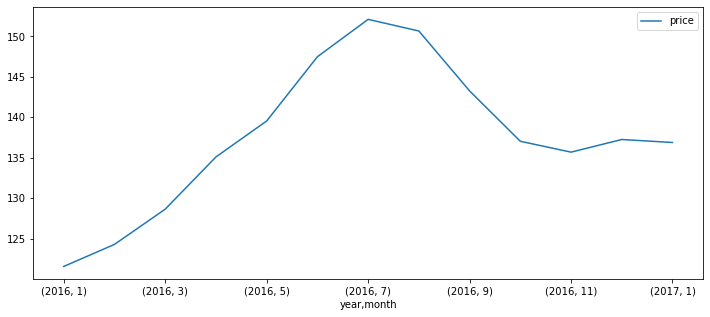

In [16]:
# Plot the average price by month 
df_calendar['year']= pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month']= pd.DatetimeIndex(df_calendar['date']).month
# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price']= df_calendar['price'].replace('[/$,]','', regex= True).astype(float)

df_calendar.groupby(['year','month'])['price'].mean().plot(figsize=(12,5));
plt.legend((['price']), loc= 1,  prop={'size': 10});

The chart showed that We will discover that the best time to visit Seattle is July.
This draws in more visitors. 

#### Section 3.1.2
2. How does pricing differ by neighbourhood, and which Seattle neighbourhoods are the most expensive? 

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

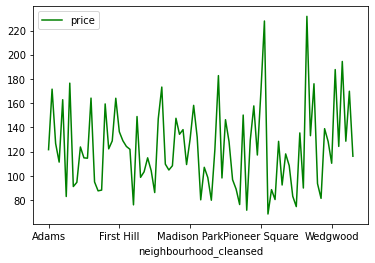

In [17]:
# Plot the average price by neighborhood

# We'll convert it to float and remove the $ symbol in order to get an average price.
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(color ='green');


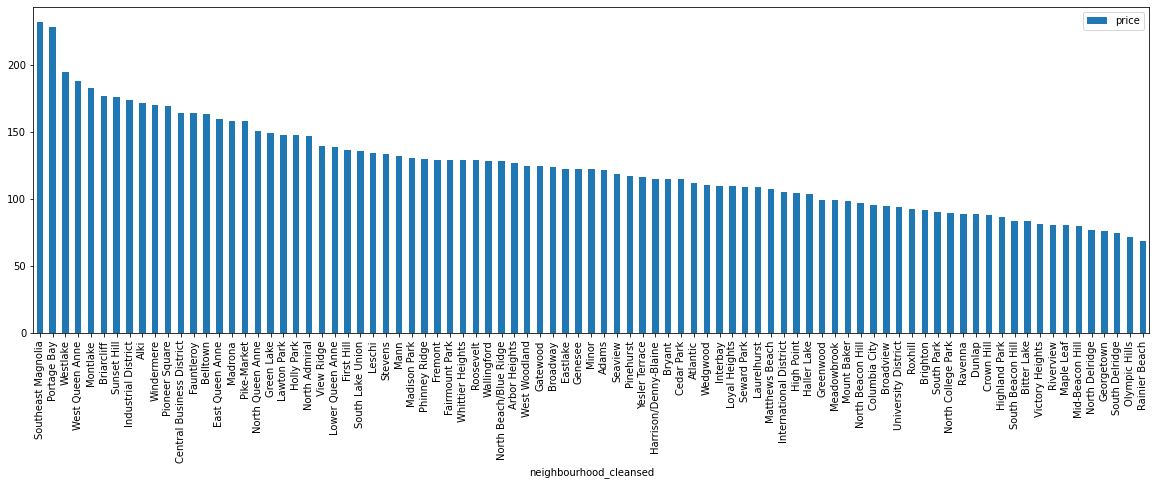

In [18]:
# Look for a relationship between the neighborhood and the pricing. 
neighborhood_price=df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending= False)
neighborhood_price.plot(kind= 'bar',figsize=(20,6));

#### FINDINGS

According to the chart above, prices in different neighbourhoods are very evenly dispersed.
Some of them are quite pricey, such as Southeast Magnolia, and others are quite affordable, such as Rainier Beach. 

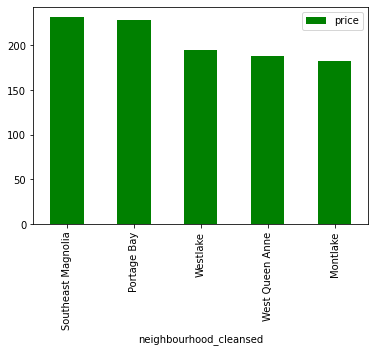

In [19]:
# Plot top 10 neighbourhoods
top10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar', color = 'green');

#### FINDINGS
The ten most expensive neighbourhoods in Seattle are shown in the chart above. 

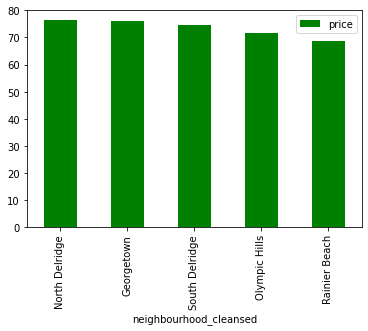

In [20]:
# Plot bottom 10 neighbourhoods
bottom10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar', color = 'green');

#### FINDINGS

The ten most cheapest neighbourhoods in Seattle are shown in the chart above. 

According to the above analysis, pricing variations between neighbourhoods are unavoidable.
With an average price of $231, the Southeast Magnolia area appears to be the most expensive of all. 

Followed by Portage Bay at $227.

Rainier Beach appears to be the cheapest, with an average price of $68.


#### Section 3.1.3
3. What effect does the kind of property in an area have on the price of the most costly neighbourhoods and the most prevalent property types?

In [21]:
# Investigate the different sorts of properties in a neighbourhoods and how they affect the price. 
print('price of properties\n',df_listings.groupby(['property_type'])[['price']].mean().sort_values(by='price',ascending=False))
print('count of properties\n',df_listings['property_type'].value_counts());

price of properties
                       price
property_type              
Boat             282.375000
Condominium      151.109890
Loft             135.700000
House            132.351414
Townhouse        129.457627
Apartment        122.932670
Camper/RV        120.461538
Bungalow         115.615385
Bed & Breakfast  112.054054
Cabin            104.666667
Treehouse        101.000000
Yurt             100.000000
Chalet            98.500000
Other             94.681818
Tent              54.000000
Dorm              39.500000
count of properties
 House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64


#### FINDINGS

We can deduce from the result that the most expensive properties are Boat and Condominium. The majority of rented homes, however, are houses and apartments.

In [22]:
# Investigate the different sorts of property in a neighbourhoods and how they affect the price. 
# Concentrate on the top five most expensive neighbourhoods from the list above: Southeast Magnolia, Portage Bay, Westlake, West Queen Anne, and Montlake. 
# Concentrate on two sorts of properties: houses and apartments. 

values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_listings_pruned1 = df_listings.loc[df_listings['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listings_pruned2 = df_listings_pruned1.loc[df_listings['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_listings_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [23]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

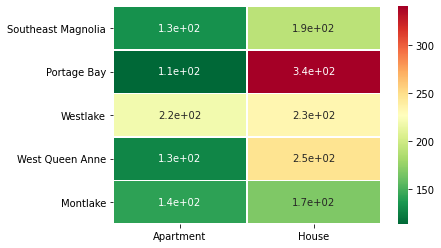

In [24]:
# Heatmap reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
idx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

#### FINDINGS

We concentrated on the top 5 most expensive neighbourhoods from the above analysis, along with Houses and Apartments, because we recognize they make up a significant portion of property types based on the previous analysis. 

Houses in Portage Bay are the most expensive, followed by Houses in West Queen Anne and Westlake, as seen above.
It's worth noting that in Westlake, both houses and apartments are almost the same price.  


### Questions  - Sentiment Analysis of Reviews

**4.** How can we classify reviews focused on sentiments?  <br>
**5.** Can we correlate positive and negative attitudes from reviews to neighbourhoods to see which neighbourhoods have higher positive sentiments and which have higher negative sentiments? <br>
**6.** Is it possible to look into some of the worst reviews for additional insights? 

In [25]:
# Create a smaller data frame with just listing ids and review comments
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [26]:
# Take a listing id and return the neighbourhood cleansed column from the listings data set with this function. 
# Subsequently, I used the listings dataset's neighbourhood column, but I discovered that some values were empty, so I switched to the neighbourhood cleansed column. 
def get_neighborhood(listing_id):
    '''
    Take a listing id and return the neighbourhood cleansed column from the listings data set with this function.
    INPUT:
    listing_id - listing_id column for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed column follow with a specific listing_id
    
    Allows you to correlate reviews with neighbourhoods by mapping each listing id to its appropriate neighbourhood. 
    '''
    neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(7202016)

'Lower Queen Anne'

In [27]:
# Implement get_neighborhood function to the listing ids
df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
df_comments.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [28]:
# Make sure to verify if any listing ids have no association with neighbourhoods 
df_comments['neighbourhood'].isnull().sum()

0

In [29]:
# SentimentIntensity Analyzer reference: https://www.nltk.org/api/nltk.sentiment.html

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Returns the compound polarity score after executing the sentiment intensity analyzer on a statement. 
    INPUT:
    sentence - the reviewer's comments in text 
    OUTPUT:
    score['compound'] - the composite score resulting from the addition of positive, negative, and neutral scores 
    
    For sentiment analysis, it returns the compound score for a single statement. 
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [30]:
# Count the number of positive, negative, and neutral compound polarity scores
print('Positive compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] > 0].count())
print('Negative compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] < 0].count())
print('Neutral compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] == 0].count())


Positive compound scores:  82450
Negative compound scores:  843
Neutral compound scores:  1556


In [31]:
# Aggregate the polarity scores by neighbourhood and average them. 
neigh_polarity = df_comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

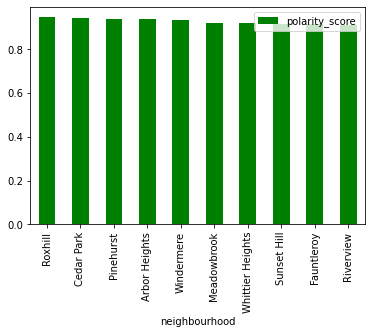

In [32]:
# Visualize top neighbourhoods based on reviews
neigh_polarity.head(10).plot(kind='bar', color = 'green');


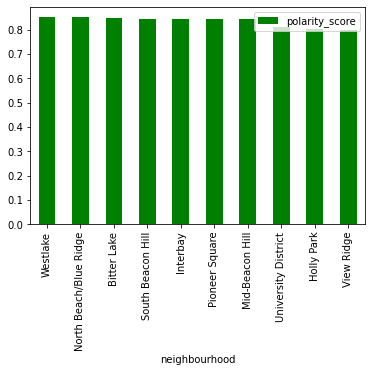

In [33]:
# Visualize bottom 10 neighbourhoods based on reviews
neigh_polarity.tail(10).plot(kind='bar', color = 'green');

#### FINDINGS

Some of the best-rated neighbourhoods include Roxhill, Cedar Park, and Pinehurst.
University District, Holly Park, and View Ridge are the neighbourhoods with the lowest rankings. 

In [34]:
# Investigate the worst reviews
df_comments.sort_values(by='polarity_score',ascending=False).tail(10)

,listing_id,comments,neighbourhood,polarity_score
32787,5805162,Die Ankunft war unkompliziert. Die Lage ist ru...,Ravenna,-0.9881
14908,685600,Das Zimmer war wie beschrieben und die Umgebun...,Lawton Park,-0.9885
1786,208356,Die Unterkunft ist so wie beschrieben und die ...,International District,-0.9892
22483,6115704,Beautiful Condo - Beware : NO AC!\nWe stayed a...,Central Business District,-0.9908
18347,26116,Für den Aufenthalt in einer fremdem Stadt hatt...,Broadway,-0.9927
75564,1775016,Staying at Robert’s place was a nightmare. At ...,Broadway,-0.9941
32404,3291777,Melissa replied to our request and approved bu...,University District,-0.9956
84378,4577542,"Die Unterkunft war sehr schön und genau so, wi...",Minor,-0.9961
29434,1018204,"leider war esnicht so fein, da die unterkunft ...",Minor,-0.9970
50261,258571,Wir sind 5 Nächte geblieben. Und es ist eine A...,Broadway,-0.9975


#### FINDINGS

It's worth noting that the majority of the reviews with low polarity ratings appear to be written in a language other than English!. Maybe the Sentiment Intensity Analyzer has this limitation.  

The other three reviews appear to be genuine complaints, with users lamenting the lack of A/C and fans, the host's rudeness, construction noise disrupting people's stay, and the place's terrible state, among other things. 

### 4. DATA PREPARATION

#### Price Prediction
Can we forecast a listing's price?
What aspects of the listing have the best correlation with price prediction?



#### Section 4.1 Handling non impacting columns

In [35]:
# Examine for missing values in price; if so, such records should be deleted from the dataset. 
df_listings['price'].isnull().sum()

0

In [36]:
df_listings.shape

(3818, 92)

In [37]:
# Remove columns that aren't likely to affect the pricing. 
df_list = df_listings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url',
                    'host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood',
                    'neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude',
                    'weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review',
                    'last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 65)

#### FINDINGS

Price information is accessible for all records in the listings dataset. 

Some columns appear to have less of an impact on price based on the field definitions, therefore we'll delete them from the dataset to collaborate with a cleaner and smaller dataset.
The following are the most common reasons for removing these columns: 
- ID field or meta data related to the listing
- Other columns that contain the same or similar data (eg: using country code and removing country) 
- Deleting some variables like street, zipcode, latitude, longitude, and so on, and retaining the analysis at the city level  

The columns we will be removing are:
id,listing_url,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,
host_url,host_thumbnail_url,host_verifications,street,neighbourhood,neighbourhood_group_cleansed,zipcode,smart_location,country,latitude,longitude,weekly_price,monthly_price,calendar_updated,calendar_last_scraped,first_review,last_review,
calculated_host_listings_count,reviews_per_month

In [38]:
# If there are any missing values, look for them in the columns.  
df_list.columns[df_list.isnull().all()].tolist()

['license']

In [39]:
# Delete license column
df_list = df_list.drop('license', axis=1)
df_list.shape

(3818, 64)

#### Section 4.2 Handling missing values in Integer and Float columns

In [40]:
# Examine all of the numerical columns and assess missing values
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### FINDINGS

bathrooms - There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 0 for Nan values

bedrooms - Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [41]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Delete square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)

In [42]:
# Verify all of the numerical columns once more.
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
bathrooms 0
bedrooms 0
beds 0
price 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


#### Section 4.3 Handling missing values in objects columns

In [43]:
# Examine all of the categorical columns for missing values.
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### FINDINGS

summary, space, neighborhood_overview, notes, transit - Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood - Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

host_response_time, host_acceptance_rate - These fields seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

host_response_rate - Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

host_is_superhost, host_has_profile_pic, host_identity_verified - These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

property_type - Since this is just 1 record, we will just drop this record

security_deposit - We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

cleaning_fee - We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float

The following fields do not have missing values, but it is important to cleanse these as well.

name, description, picture_url - Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

experiences_offered - all values in this column is 'None' and it doesn't add any value, so we will be dropping this column

market - all values are 'Seattle' in this column, since we have other descriptors for Seattle, we will be dropping this column

is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

extra_people - Need to remove $ sign and convert to float

jurisdiction_names - All values are 'WASHINGTON', doesn't add much value, will be dropping this column

city - There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

state - There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column

In [44]:
# Function to set all text fields to boolean

def text_to_boolean(text_data):
    '''
    Function to set all discriptive fields into boolean
    INPUT
    Columns that contain descriptive information about property.
    OUTPUT
    Return 0 if no text available else return 1
    '''
    if not text_data:
        return 0
    else:
        return 1
    
text_col = ['summary','space','neighborhood_overview','notes','transit','name','description',
                    'picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_col:
    df_list[t]= df_list[t].apply(text_to_boolean)


In [45]:
# Function to set all t/f fields to 1/0
def tf_to_boolean(tf_data):
    '''
    Function to set all True and False fields into boolean
    INPUT
    Columns that contain that true or false statement.
    OUTPUT
    Return 1 if true else return 0 if False
    '''
    if tf_data== 't':
        return 1
    else:
        return 0
    
tf_col =['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
         'has_availability','requires_license','instant_bookable','require_guest_profile_picture',
         'require_guest_phone_verification']

for d in tf_col:
    df_list[d]= df_list[d].apply(tf_to_boolean)

In [46]:
# Assign N/A to applicable host fields
df_list['host_response_time']= df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate']= df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate']= df_list['host_response_rate'].apply(lambda x: 0 if x== 'N/A' else x)
df_list['host_response_rate']= df_list['host_response_rate'].replace('[\%,]', '', regex= True).astype(float)
df_list['host_response_rate']= df_list['host_response_rate'].fillna(0)

# Delete record with empty value for property_type
df_list= df_list.dropna(subset= ['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Delete columns experiences_offered, market and jurisdiction_name
df_list= df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city']= df_list['city'].str.lower()
df_list['city']= df_list['city'].str.strip()
df_list['state']= df_list['state'].str.lower()

In [47]:
# Check to see if all missing values have been filled in
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


#### Section 4.4 Handling Amenities  column

In order to handle the amenities column, we will try to understand which are some of the most common amenities that are present within the listings. Once we know which amenities are important, we will create additional columns to represent each amenity as a boolean field.

In [48]:
# Handle amenities - Investigate most common amenities
amenities = []
for index, row in df_list.iterrows():
    row['amenities']= row['amenities'].replace('{', '')
    row['amenities']=row['amenities'].replace('}', '')
    row['amenities']=row['amenities'].replace('"', '')
    my_list= row['amenities'].split(',')
    for n in my_list:
        amenities.append(n)

amenities_count= Counter(amenities)
amenities_count.most_common()  

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

#### FINDINGS

Based on the above, I chose the amenities that show more than 2000 times (about 52 percent of the total dataset), which are listed below.

('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),

In [49]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating',
                     'amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector',
                     'amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer',
                     'amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV',
                     'amenities_carbon_monoxide_detector|Carbon Monoxide Detector',
                     'amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']

for c in amenities_new_cols:
    c_col, c_desc= c.split('|')
    df_list[c_col]= df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [50]:
# Delete the original amenities field
df_list = df_list.drop('amenities', axis = 1)


In [51]:
# Show The structure of the data - Columns and Rows
df_list.shape

(3817, 72)

In [52]:
# Examine the remaining column of objects.
df_list.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

#### Section 4.5 Creating Dummy Columns

To deal with categorical variables, we need to add dummy columns; otherwise, our model will fail if all of the values are not in numbers. We're deleting the original columns and replacing them with fake columns of the categorical variable with prefix column names.

In [53]:
# Dummies for categorical fields are available.
cat_fields = df_list.select_dtypes(include=['object']).columns

df_list = pd.get_dummies(df_list, columns=cat_fields)
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [54]:
# Show The structure of the data - Columns and Rows
df_list.shape

(3817, 191)

####  Section 4.6 Splitting the data set into Independent variables and dependent variables

In [55]:
# Build out X and y, y to be price column and X to be all the other columns
X = df_list.drop(['price'], axis=1)
y = df_list['price']

In [56]:
y.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

### 5. MODELING

Let's divide the data into two groups: training and testing. The sample size for this test is 0.30.

In [57]:
# Make data sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [58]:
# Create a linear regression model and fits it to a set of training data.
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was -1.490333843334653.  The rsquared score on the test data was -1.6594687179204817.


### 6. EVALUATION

In [59]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# Apply the function
coef_df = coef_weights(lm_model.coef_, X_train)

# A short glance at the most important outcomes
coef_df.head(10)

,est_int,coefs,abs_coefs
0,name,5.903814e+16,5.903814e+16
3,description,-3.900332e+16,3.900332e+16
2,space,3.304134e+16,3.304134e+16
1,summary,3.150218e+16,3.150218e+16
4,neighborhood_overview,-2.184314e+16,2.184314e+16
11,host_about,1.662711e+16,1.662711e+16
9,host_since,1.212284e+16,1.212284e+16
15,host_neighbourhood,1.036848e+16,1.036848e+16
8,host_name,-9.262064e+15,9.262064e+15
7,picture_url,-9.025306e+15,9.025306e+15


#### FINDINGS

After cleaning up  and data wrangling for the dataset, I was able to get an r2score of 0.62 on both training and test data sets. Based on the above coefficient analysis, the features that have the most impact on price are a combination of host details and descriptive information about the listing such as host_name, has_availability, transit, space, host_about, notes, neighborhood_overview etc. 

Of course, needless to say, these results may be impacted based on how the data was standardized and some of the choices made. 